# Recap

Die wichtigsten Elemente von Funktionen

In [1]:
def funktions_name(parameter1, parameter2, parameter_mit_default=4):
    lokale_variable = parameter1 + +parameter2 + parameter_mit_default
    return lokale_variable

resultat = funktions_name(1, 3)  # für den dritten Parameter müssen wir nicht unbedingt einen Werte übergeben
#print(lokale_variable)  # diese Zeile wird nicht funktionieren, da `lokale_variable` hier nicht mehr sichtbar ist

## Fragen aus der Aufgabe "Weihnachtsbaum zeichnen"

Bei einer Lösung tauchte das Problem auf, dass eine Zahl nicht korrekt verwendet werden konnte, um damit ein Zeichen mehrfach zu wiederholen. Dies Problem konnte behoben werden, indem man einfach ein `/` durch ein `//` ersetzt. Warum hilft das? Was macht das überhaupt?

Das Problem lässt sich ganz einfach erkennen, wenn man dividiert und das Resultat für eine Multiplikation mit einem Zeichen verwenden will:

In [31]:
(5 / 2) * "#"

TypeError: can't multiply sequence by non-int of type 'float'

Auf Deutsch übersetzt heisst dies soviel wie "ich kann keine `float`-Zahl mit einer Zeichenkette multiplizieren, ich bräuchte da eine ganze Zahl, ein `int`".

Mit der Funktion `type()` können wir uns den Typ eines Werts ausgeben lassen. Wenn wir dies mit der Rechnung `5 / 2` machen, stellen wir fest, dass hier tatsächlich ein `float` mit dem Wert `2.5` entsteht:

In [33]:
type(5/2), 5/2

(float, 2.5)

Wir müssen also aus diesem Wert irgendwie einen `int` erzeugen. Dafür gibt es zwei Möglichkeiten.

**Möglichkeit 1** wir nutzen die bereits bekannte Funktion `int()`, um diesen Wert durch Abschneiden des Nachkommaanteils einfach in eine ganze Zahl zu verwandeln. **!!Wichtig!!** es handelt es sich tatsächlich einfach um ein Abschneiden und nicht um ein Runden. Mathematisch entspricht dies der Abrundungsfunktion (Engl. *floor* Funktion): $$v = \lfloor 5/2 \rfloor$$

In [34]:
int(5/2)

2

Als Ergänzung sei erwähnt, dass es in Python auch eine "echte" Rundungsfunktion gibt. Diese benötigt neben der zu rundenden Zahl auch die Anzahl gewünschter Nachkommastellen:

In [35]:
round(5/2, 0)

2.0

Man beachte aber, dass diese Funktion auch wieder ein `float` zurückliefert und auch dieser wieder in ein `int` verwandelt werden müsste, wenn man ihn mit Zeichenketten kombinieren möchte.

**Möglichkeit 2** verhindert das Entstehen von `floats` schon bei der Berechnung. Bei den Operationen `+`, `-` und `*` bleiben `int`-Zahlen als solche bestehen und es werden nicht plötzlich `floats` daraus. Mit der Operation `/` (Division) entstehen aber immer `floats`. Python bietet aber auch die "Ganzzahldivision" `//` an. Wenn wir mit `//` dividieren, wird immer ein `int` erzeugt. Es handelt sich also um eine Kombination aus `/` und `int`:

In [36]:
5//2

2

Dies können wir jetzt für die Multiplikation mit den Zeichen verwenden:

In [2]:
(5//2) * "#"

'##'

Als Ergänzung zur Ganzzahldivision sei hier auch noch die Modulooperation erwähnt. Diese gibt den Rest der Division zurück. Bei der Operation "19 geteilt durch 5" würden wir das Ganzzahlresultat 3 erhalten aus der Python-Operation `19//5` und den Rest von 4 aus der Python Operation `19%5`.

In [8]:
print(f"Ganzzahldivision 19//5 = {19//5}")
print(f"Rest der Division 19%5 = {19%5}")

Ganzzahldivision 19//5 = 3
Rest der Division 19%5 = 4


# 3) Clean-code und Klassen

## Clean-code

### Source code conventions

In produktiven Software Teams einigt man sich üblicherweise auf eine Reihe von Konventionen, wie man Code schreibt. Dies verbessert die Lesbarkeit und vereinfacht die Zusammenarbeit. Konventionen haben verschiedene Aspekte:

**Sprachen-spezifische Konventionen**

Jede Programmiersprache befolgt ihre eigenen Konventionen, wie Bezeichner (Variablennamen, Klassennamen, ...) geschrieben werden.

In Python werden üblicherweise

  * Variablen und Funktionsnamen mit Kleinbuchstaben geschrieben: `name`, `addresse`. Wenn ein Bezeichner aus mehreren Worten besteht, werden die Wortteile durch ein `_` getrennt: `konto_inhaber`, `buchstaben_mischen`.
  <br />Dieser Namensstil wird auch *snake case* genannt.
  * Klassennamen beginnen mit Grossbuchstaben: `Bankkonto`, `Spieler`. Wenn ein Bezeichner aus mehreren Worten besteht, werden die einzelnen Wortteile wieder mit einem Grossbuchstaben gestartet und ohne Abstände aneinander gehängt: `SpielerFigur`, `BuchstabenListe`.
  <br />Dieser Namensstil wird auch *Pascal case* genannt.
  * Konstanten, also Variablen, welche ihren Wert zur Laufzeit des Programms nicht ändern, werden vollständig in Grossbuchstaben, und bei mehreren Worten durch `_` getrennt geschrieben: `MAXIMALE_BUCHSTABEN_ANZAHL`, `STANDARD_WERT`.
  <br />Dieser Namensstil wird manchmal auch *screaming snake case* oder *shouty snake case* genannt.

**Team interne Konventionen**

Zusätzlich zu den Sprachspezifischen Konventionen können Teams ihre internen und eigenen Konventionen einführen. Beispiele könnten sein

  * Wir hängen immer die Einheiten von Messwerten an Variablen und Funktionsnamen.
  * Wir schreiben alles in Englisch und übersetzen auch Begriffe z.B. aus einer Schweizer-Behörde.
  * Wir verwenden folgende Abkürzungen: ......
  * Eine Zeile darf maximal 120 Zeichen lang werden
  * Schleifen und Abfragen dürfen nicht mehr als 3 Verschachtelungstiefen erreichen.

### Motivationsbeispiel

Nehmen wir an, dass wir eine Bibliothek für physikalische Berechnungen schreiben. Diese bietet zum Beispiel eine Funktion zur Berechnung einer Geschwindigkeit an:

In [9]:
def geschwindigkeit(distanz, zeit):
    return distanz / zeit

Irgendwo anders in unserem Code wollen wir dann diese Funktion aufrufen.

In [12]:
zurück_gelegte_distanz = 20  # würde z.B. aus einer Messung stammen
benötigte_zeit = 10  # auch dies käme aus einer Messung
meine_geschwindigkeit = geschwindigkeit(zurück_gelegte_distanz, benötigte_zeit)

print(meine_geschwindigkeit)

2.0


Aber welche Einheit hat diese Geschwindigkeit nun?

Durch einen einfachen Suffix an den Namen der Variablen können wir dies klar machen. Wir verwenden z.B. `_m` zur Darstellung von Metern und `_s` zur Darstellung von Sekunden:

In [41]:
zurück_gelegte_distanz_m = 20
benötigte_zeit_s = 10

## Klassen

Klassen erlauben es, eine Sammlung an Daten und dem dazugehörigen Verhalten (Funktionen) zu kombinieren und als verallgemeinertes Konzept darzustellen. Dies vereinfacht die Verwendung der entsprechenden Daten.

### Beispiel "Spielfiguren"

Nehmen wir an, wir wollten ein Spiel programmieren. In diesem Spiel kann der Spieler eine Spielfigur kontrollieren, welche auf dem Bildschirm an einer bestimmten Position und in einer bestimmten Farbe angezeigt wird. Zusätzlich hat die Figur eine Menge an Lebenspunkten (Englisch "Hit Points", bzw. kurz HP). All diese Werte könnten wir ganz einfach in individuellen Variablen speichern:

In [42]:
spieler_position_x = 100
spieler_position_y = 150
spieler_farbe = "grün"
spieler_hp = 200

Damit das Spiel spannend wird, fügen wir auch noch ein Monster hinzu. Auch dieses wird an einer Position auf dem Bildschirm dargestellt, auch dieses hat eine Farbe und auch das Monster hat Hit Points:

In [43]:
monster_position_x = 200
monster_position_y = 250
monster_farbe = "rot"
monster_hp = 50

Bis hierher haben wir nur die Datenhaltung von Spielerfigur und Monster implementiert. Nun möchten wir beide auch tatsächlich noch auf dem Bildschirm darstellen. Um uns nicht mit den Details von graphischen Bibliotheken herumzuschlagen, geben wir für die Darstellung einfach die Farbe und die Koordination mit einem `print()` aus:

In [44]:
def figur_zeichnen(x, y, farbe):
    print(f"Figur in {farbe} an position {x}, {y}")

Wir können also jetzt Spielerfigur und Monster zeichnen:

In [45]:
figur_zeichnen(spieler_position_x, spieler_position_y, spieler_farbe)
figur_zeichnen(monster_position_x, spieler_position_y, monster_farbe)

Figur in grün an position 100, 150
Figur in rot an position 200, 150


Oh, aber Achtung, da ist uns gerade ein Fehler passiert! Siehst du, wo?

Da ist uns beim Aufruf der zweiten Funktion der falsche, zweite Parameter rein gerutscht. Wir haben ausversehen nochmal die Y-Position des Spielers eingefügt.

Könnten wir das nicht anders schreiben, sodass solche Fehler nicht mehr passieren? Es wäre ja eigentlich klar, dass diese drei Variablen immer zusammen gehören. Ja natürlich geht das! Mit **Klassen**!!

In [18]:
# Klassen sind gewissermassen Blueprints oder Baupläne für Instanzen oder Objekte.
# Ähnlich wie in der Realität repräsentiert eine Klasse eine ganze Sammlung bzw.
# eine Kategorie von tatsächlichen Objekten.
class Figur:
    # __init__() wird durch den Aufruf Figur() automatisch ausgeführt. Alle Parameter,
    # die wir Figur() übergeben, werden der __init__() Funktion ebenfalls übergeben
    def __init__(self, x, y, farbe, hp):
        self.x = x
        self.y = y
        self.farbe = farbe
        self.hp = hp
        
    # In allen Funktionen innerhalb der Klasse lautet der erste Parameter `self`, egal
    # ob und wieviele zusätzlichen Parameter noch angegeben werden.
    def zeichne(self):
        print(f"Figur in {self.farbe} an position {self.x}, {self.y}")

# Nun können wir neue Figuren erzeugen und sie Variablen zuweisen.
spieler = Figur(100, 150, "grün", 200)
monster = Figur(200, 250, "rot", 50)

# Beim Aufruf der zeichnen()-Funktion brauchen wir uns keine Gedanken mehr zu machen,
# welches die richtigen Werte sind. Die Werte sind schon alle im Objekt vorhanden.
monster.zeichne()
# Wenn wir wollten, könnten wir auch direkt auf diese Element im Objekt zugreifen
print(f"x-Koordinate des Spielers: {monster.x}")

Figur in rot an position 200, 250
x-Koordinate des Spielers: 200


Die Notation `spieler.zeichne()` mag noch etwas verwirren. In der Beschreibung der Klasse haben wir die Funktion `zeichne()` doch mit einem Parameter `self` deklariert, beim Aufrufen der gleichen Funktion müssen wir aber diesen jetzt scheinbar gar nicht mehr angeben.

Dies liegt daran, dass die Notation `spieler.zeichne()` eine verkürzte Schreibweise des folgenden Codes darstellt.

In [47]:
Figur.zeichne(spieler)

Figur in grün an position 100, 150


Jetzt wird `zeichne()` tatsächlich der `spieler` als Parameter übergeben. Wir mussten uns aber auch noch erinnern, dass `spieler` aus der Klasse `Figur` erzeugt wurde und dass die Funktion `zeichne()` dort drin enthalten war (`Figur.zeichne()`). Diese Verknüpfung zwischen `spieler` und `Figur` hat sich Python aber schon für uns gemerkt und deshalb können wir dis auch verkürzt als `spieler.zeichne()` schreiben.

Der Vollständigkeit halber ist hier auch noch das Erzeugen aus Zeichnen des Monsters dargestellt:

In [48]:
monster = Figur(200, 250, "rot", 50)
monster.zeichne()

Figur in rot an position 200, 250


<div class="alert alert-block alert-info">
    <p><b>Hinweis:</b> Funktionen die innerhalb von Klassen definiert werden, nennt man in der Softwareentwicklung auch <b>Methoden</b>.</p>
</div>

### Beispiel "Vektoren"

Mit Klassen lassen sich auch abstraktere Konzepte zusammenfassen. Ein einfaches Beispiel dafür sind Vektoren aus der Mathematik. Für einen zweidimensionalen Vektor möchten wir zum Beispiel x- und y-Koordinaten zusammenfassen. Zusätzlich gibt es auch hier eine Reihe von Funktionen, die wir mit Vektoren ausführen möchten, wie zum Beispiel Addition von zwei Vektoren, Berechnen der Länge des Vektors etc.

In [49]:
import math


class Vektor:
    """Eine ganz einfache Klasse, die einige wenige der Operationen von
    mathematischen Vektoren implementiert"""

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def länge(self):
        return math.sqrt(self.x * self.x + self.y * self.y)

    def plus(self, anderer_vektor):
        """Erzeugt einen neuen Vektor der aus der Summe dieses Vektors und des
        `anderer_vektor`s besteht."""
        neues_x = self.x + anderer_vektor.x
        neues_y = self.y + anderer_vektor.y
        return Vektor(neues_x, neues_y)

    # Die folgenden, speziellen Funktionen werden weiter unten genauer erläutert
    def __add__(self, anderer_vektor):
        """Diese Methode erlaubt es, Instanzen der Klasse Vektor mit dem
        +-Operator zu addieren."""
        return self.plus(anderer_vektor)

    def __str__(self):
        """Die __str__ Funktion bietet eine schöne Darstellung eine Vektor-Objekts,
        wenn wir dieses in einer Zeichenkette einfügen"""
        return f"Vektor({self.x},{self.y})"


Genau wie bei der `Figur` können wir nun von Vektoren wieder Instanzen erzeugen. Fürs erste wollen wir uns dann auf die Funktionen `länge()` und `plus()` konzentrieren und schauen, was damit möglich ist:

In [50]:
v1 = Vektor(5, 6)
v2 = Vektor(1, 1)

Die Funktion `plus()` nimmt einen anderen Vektor entgegen, zählt diesen zum eigenen Vektor Komponenten-weise dazu und gibt einen neuen Vektor mit der Summe zurück:

In [51]:
v_summe = v1.plus(v2)
print(v_summe)

Vektor(6,7)


Und mit der `länge()`-Funktion erhalten wir die Länge des Vektors, mathematisch also die Operation $$\| \mathbf{v} \|$$

In [52]:
print(f"Länge von v1: {v1.länge()}")

Länge von v1: 7.810249675906654


### Spezielle Funktionen

<div class="alert alert-block alert-info">
    <p><b>Hinweis:</b> Dieses Kapitel geht auf fortgeschrittenere Themen von Python ein. Python-Einsteiger können diesen Abschnitt fürs erste gerne ignorieren ohne dabei etwas für das eigene Projekt zu verpassen.</p>
</div>

Die Notation `v1.plus(v2)` zur Addition von zwei Vektoren ist etwas sperrig, wenn wir Vektor-Addition aus der Mathematik kennen. Dort schreiben wir ja in der Regel `v1 + v2`. Es wäre doch schön, wenn wir dies auch mit Python machen könnten. Tatsächlich ist dies auch möglich. Wenn wir in unserer Klasse die Funktion `__add__(self, other)` implementieren, benutzt Python diese Funktion automatisch, wenn wir links von einem `+` eine Instanz/ein Objekt unserer Klasse stehen haben. Der Teil rechts des `+` wird dann der `__add__`-Funktion als Parameter übergeben:

In [53]:
v3 = v1 + v2
# der obige Code entspricht dieser umständlicheren Variante
v3 = v1.__add__(v2)

Python erlaubt auch die Implementierung anderer Operationen, wie `-`, `/`, `*`, .... Details dazu findet Ihr unter https://docs.python.org/3/reference/datamodel.html#emulating-numeric-types sowie im Internet wenn Ihr nach "Python magic methods" sucht.

Eine weitere Spezialfunktion ist `__str__()`. Der Zweck dieser Funktion ist es, eine schöne Textdarstellung unseres Vektor-Objekts zu erzeugen. Wenn wir nochmal auf den `spieler` von weiter oben zurück greifen und diesen einfach als Text ausgeben, sieht das in etwa so aus:

In [54]:
print(f"{spieler}")

Diese Ausgabe ist nicht sehr aussagekräftig. Wir haben keine Ahnung, um welche Figur es sich hier handelt. Mindestens schön könnte es ja sein, die Farbe und die Hit-Points der Figur zu erfahren. Für den Vektor haben wir dieses Problem gelöst, in dem wir in der Funktion `__str__` eine Zeichenkette zurückgeben, welche den Vektor in etwas menschenlesbarer Form zurück gibt. Damit ist die Ausgabe auch etwas schöner, wenn wir den Vektor printen:

In [55]:
print(f"{v1}")

Vektor(5,6)


In [56]:
# Diese Zelle kann nur ausgeführt werden, wenn iplantuml installiert wurde
# und ist auch nur nötig, wenn man Änderungen an den Diagrammen vornehmen will
import iplantuml

## Aufgabenstellung

Schreibe eine Python-Klasse, die Bankkonten abbildet. Diese neue Klasse `BankKonto` soll folgende Funktionen anbieten:

 * Mit der Funktion `einzahlen(self, betrag)` soll es möglich sein, einen Geldbetrag in CHF auf das Konto einzuzahlen.
 * Mit der Funktion `abheben(self, betrag)` soll es möglich sein, einen Geldbetrag in CHF vom Konto abzuheben
 * Mit der Funktion `kontostand(self)` soll der aktuelle Kontostand des Kontos in CHF zurück geliefert werden.
 * Mit der Funktion `konto_stand_in_eur(self)` soll der aktuelle Kontostand des Kontos aufgrund eines fixen Umrechnungsfaktors zurück geliefert werden.
 * Mit der Funktion `überweisen(self, anderes_konto, betrag)` soll es möglich sein, den angegebenen Betrag in CHF von diesem Konto auf das übergebene `anderes_konto` zu überweisen.

Diese Anforderungen könnten auch in Form eines UML Diagramms wie folgt dargestellt werden:

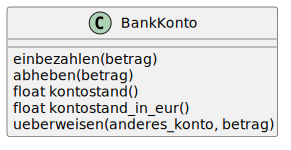

In [59]:
%%plantuml
@startuml

class BankKonto {
    einbezahlen(betrag)
    abheben(betrag)
    float kontostand()
    float kontostand_in_eur()
    ueberweisen(anderes_konto, betrag)
}
@end

Versuche dann mit Deiner Implementierung der `BankKonto`-Klasse folgenden Beispiel-Code zu implementieren und auszuführen.

In [19]:
class BankKonto:
    def __init__(self, inhaber, start_betrag=0):
        self.inhaber = inhaber      
        self.kontostand_chf = start_betrag  
        # self.inhaber speichert den Namen des Kontoinhabers
        # self.kontostand_chf speichert den aktuellen Kontostand in CHF
        
    def einbezahlen(self, betrag):
        # Einzahlung: Erhöht den Kontostand um den angegebenen Betrag
        self.kontostand_chf += betrag

    def abheben(self, betrag):
        # Abheben: Prüft zuerst, ob genügend Guthaben vorhanden ist
        if betrag <= self.kontostand_chf:
            # Falls ja, wird der Betrag abgezogen
            self.kontostand_chf -= betrag
        else:
            # Falls nicht, Fehlermeldung ausgeben
            print("Nicht genügend Guthaben!")

    def kontostand(self):
        # Gibt den aktuellen Kontostand in CHF zurück
        return self.kontostand_chf

    def kontostand_in_eur(self):   
        # Rechnet den aktuellen Kontostand in Euro um
        # Hier mit einem fixen Umrechnungsfaktor (CHF → EUR)
        umrechnungsfaktor = 0.95  
        return self.kontostand_chf * umrechnungsfaktor

    def überweisen(self, anderes_konto, betrag):  
        # Überweisung: Prüft, ob genügend Guthaben vorhanden ist
        if betrag <= self.kontostand_chf:
            # Falls ja, wird der Betrag vom eigenen Konto abgezogen
            self.kontostand_chf -= betrag
            # und auf das andere Konto gutgeschrieben
            anderes_konto.kontostand_chf += betrag
        else:
            # Falls nicht, Fehlermeldung ausgeben
            print("Überweisung nicht möglich, nicht genug Guthaben!")



# Hast Du der __init__-Funktion die Möglichkeit gegeben, den Namen des Kontoinhabers und einen Start-Wert für das Konto anzugeben?
konto_anna = BankKonto("Anna", 200)  # Anna soll ein Konto mit 200 Franken Start-Kapital haben

konto_peter = BankKonto("Peter", 100)  # Auf Peters Konto sind anfänglich nur 100 Franken

konto_anna.einbezahlen(100)  # wir bezahlen auf Annas Konto 100 Franken ein, neu sollte da 300 Franken drauf sein
# Gibt die folgende Zeile tatsächlich 300 aus? Hast Du sichergestellt, dass die Funktion kontostand() einen Wert
# zurück liefert mit `return`? Oder hast Du diesen nur mit `print` ausgegeben?
print(f"Annas Kontostand: {konto_anna.kontostand()}")

konto_anna.überweisen(konto_peter, 50)  # wir überweisen 50 Franken von Annas Konto auf Peters Konto
# Stimmen die neuen Kontostände wieder?
print("Nach der Überweisung:")
print(f"Annas Kontostand: {konto_anna.kontostand()}")
print(f"Peters Kontostand: {konto_peter.kontostand()}")

# Hast Du auch die Funktion für eine Währungsumrechnung implementiert? Was gibt bei Dir folgender Aufruf aus?
print(f"Annas Kontostand in Euro: {konto_anna.kontostand_in_eur()}")

# Hast Du Dir auch schon Gedanken gemacht, was passieren soll, wenn das Konto überzogen wird? Erlaubst Du dies?
# Diese Gedanken kannst Du Dir mit den Erweiterungen im folgenden Abschnitt machen.
konto_peter.abheben(1000)
print(f"Peters Kontostand nach Überziehen: {konto_peter.kontostand()}")

Annas Kontostand: 300
Nach der Überweisung:
Annas Kontostand: 250
Peters Kontostand: 150
Annas Kontostand in Euro: 237.5
Nicht genügend Guthaben!
Peters Kontostand nach Überziehen: 150


### Erweiterung der Anforderungen

Wenn Du die ursprünglichen Anforderungen erfüllt hast, versuche auch noch eine oder mehrere der folgenden Anforderungen zu erfüllen:

 * Überlege dir, wie Du verhindern könntest, dass man ein Konto überziehen kann. Überlege Dir dabei, wie du den Nutzer Deiner Klasse darüber informieren willst, dass die `abheben`-Funktion nicht erfolgreich war.

In [2]:
# Musterlösung Dozent "Bankkonto" (Wegmann, 2025)

"""Beispielimplementierung zur Einführung in Klassen in Python.

Es wird eine einfache Implementierung eines Bankkontos gezeigt.

Gemäss Aufgabenstellung sollte eine Klasse "Bankkonto" mit
folgenden Methoden implementiert werden:

    1. Eine Methode einzahlen(self, betrag), um einen Geldbetrag
       in CHF auf das Konto einzuzahlen
    2. Eine Methode abhheben(self, betrag), um einen Geldbetrag
       in CHF vom Konto zu ab zu heben
    3. Eine Methode kontostand(self) anbieten, mit der man den
       aktuellen Kontostand in CHF abfragen kann
    4. Eine Methode kontostand_in_euro(self) anbieten, mit der
       man den aktuellen Kontostand zu einem Wechselkurs in EUR
       abfragen kann
    5. Eine Methode überweisen(self, anderes_konto, betrag) mit
       der man den angegebenen Betrag auf das angegebene Konto
       überweisen kann
"""


class Bankkonto:
    """Klasse zur Verwaltung eines Bankkontos"""
    def __init__(self, inhaber_name, start_betrag_in_chf):
        self.inhaber_name = inhaber_name
        self.kontostand_in_chf = start_betrag_in_chf

    def kontostand(self):
        """Liefert den aktuellen Kontostand in Schweizer Franken"""
        return self.kontostand_in_chf

    def kontostand_in_eur(self):
        """Liefert den aktuellen Kontostand umgerechnet mit einem
        fixen Konversionsfaktor in Euro."""
        return self.kontostand_in_chf * 0.97

    def einzahlen(self, einzahl_betrag):
        """Zahlt den angegebenen Betrag auf das Konto ein."""
        self.kontostand_in_chf += einzahl_betrag

    def abheben(self, abhebe_betrag):
        """Hebt den angegebenen Betrag vom Konto ab."""
        if self.kontostand_in_chf < abhebe_betrag:
            raise ValueError("Kontostand zu niedrig")
        self.kontostand_in_chf -= abhebe_betrag

    def überweisen(self, anderes_konto, betrag):
        """Überweist den angegebenen Betrag auf das angegebenen andere
        Konto."""
        # An dieser Stelle könnte man die Überweisung auch durch den Code
        # implementieren, den wird schon in einzahlen() und abheben()
        # verwendet haben, also wie folgt
        #
        #   self.kontostand_in_chf -= betrag
        #   anderes_konto.kontostand_in_chf += betrag
        #
        # Der Nachteil an dieser Version ist, dass wir alle Ergänzungen,
        # welche wir in einzahlen() und abheben() noch machen, auch hier
        # wieder ergänzen müssten. Z.B. haben wir schon Code eingefügt,
        # um ein Überziehen des Kontos zu verhindern. Dies müssten wir
        # auch hier wieder einfügen.
        self.abheben(betrag)
        anderes_konto.einzahlen(betrag)

    def __str__(self):
        """Mit der __str__-Methode kann man eine schönere Darstellung eines
        Bankkontos erreichen, wenn man dieses als Parameter bei einem print()-
        Aufruf übergibt. In diesem Beispiel wird dazu der/die Kontoinhaber/in
        gefolgt vom aktuellen Kontostand ausgegeben."""
        return f"{self.inhaber_name}s Konto: {self.kontostand_in_chf} CHF"


mein_konto = Bankkonto("Silvan", 40)
susans_konto = Bankkonto("Susan", 30)

print(mein_konto.kontostand())

print("Startzustand:")
print(mein_konto)
print(susans_konto)
print()  # Aufrufen der Funktion 'print' ohne Parameter erzeugt einen Zeilenumbruch


mein_konto.überweisen(susans_konto, 25)

print("Zustand nach der Überweisung von 25 CHF:")
print(mein_konto)
print(susans_konto)

40
Startzustand:
Silvans Konto: 40 CHF
Susans Konto: 30 CHF

Zustand nach der Überweisung von 25 CHF:
Silvans Konto: 15 CHF
Susans Konto: 55 CHF
